# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Muhammad Tsaqib Adha
- **Email:** tsaqibadha@gmail.com
- **ID Dicoding:** tsaqibadha

## Import Semua Packages/Library yang Digunakan

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from shutil import copyfile
import tensorflow as tf




!pip install kaggle

In [50]:
!pip install tensorflowjs

## Data Preparation

### Data Loading

In [51]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tsaqibadha","key":"ce75479f778e1d57ffaaf87420d1c314"}'}

In [52]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sshikamaru/fruit-recognition
!unzip fruit-recognition

Streaming output truncated to the last 5000 lines.
  inflating: train/train/Pepper Green/Pepper Green_264.jpg  
  inflating: train/train/Pepper Green/Pepper Green_265.jpg  
  inflating: train/train/Pepper Green/Pepper Green_266.jpg  
  inflating: train/train/Pepper Green/Pepper Green_267.jpg  
  inflating: train/train/Pepper Green/Pepper Green_268.jpg  
  inflating: train/train/Pepper Green/Pepper Green_269.jpg  
  inflating: train/train/Pepper Green/Pepper Green_27.jpg  
  inflating: train/train/Pepper Green/Pepper Green_270.jpg  
  inflating: train/train/Pepper Green/Pepper Green_271.jpg  
  inflating: train/train/Pepper Green/Pepper Green_272.jpg  
  inflating: train/train/Pepper Green/Pepper Green_273.jpg  
  inflating: train/train/Pepper Green/Pepper Green_274.jpg  
  inflating: train/train/Pepper Green/Pepper Green_275.jpg  
  inflating: train/train/Pepper Green/Pepper Green_276.jpg  
  inflating: train/train/Pepper Green/Pepper Green_277.jpg  
  inflating: train/train/Pepper Gre

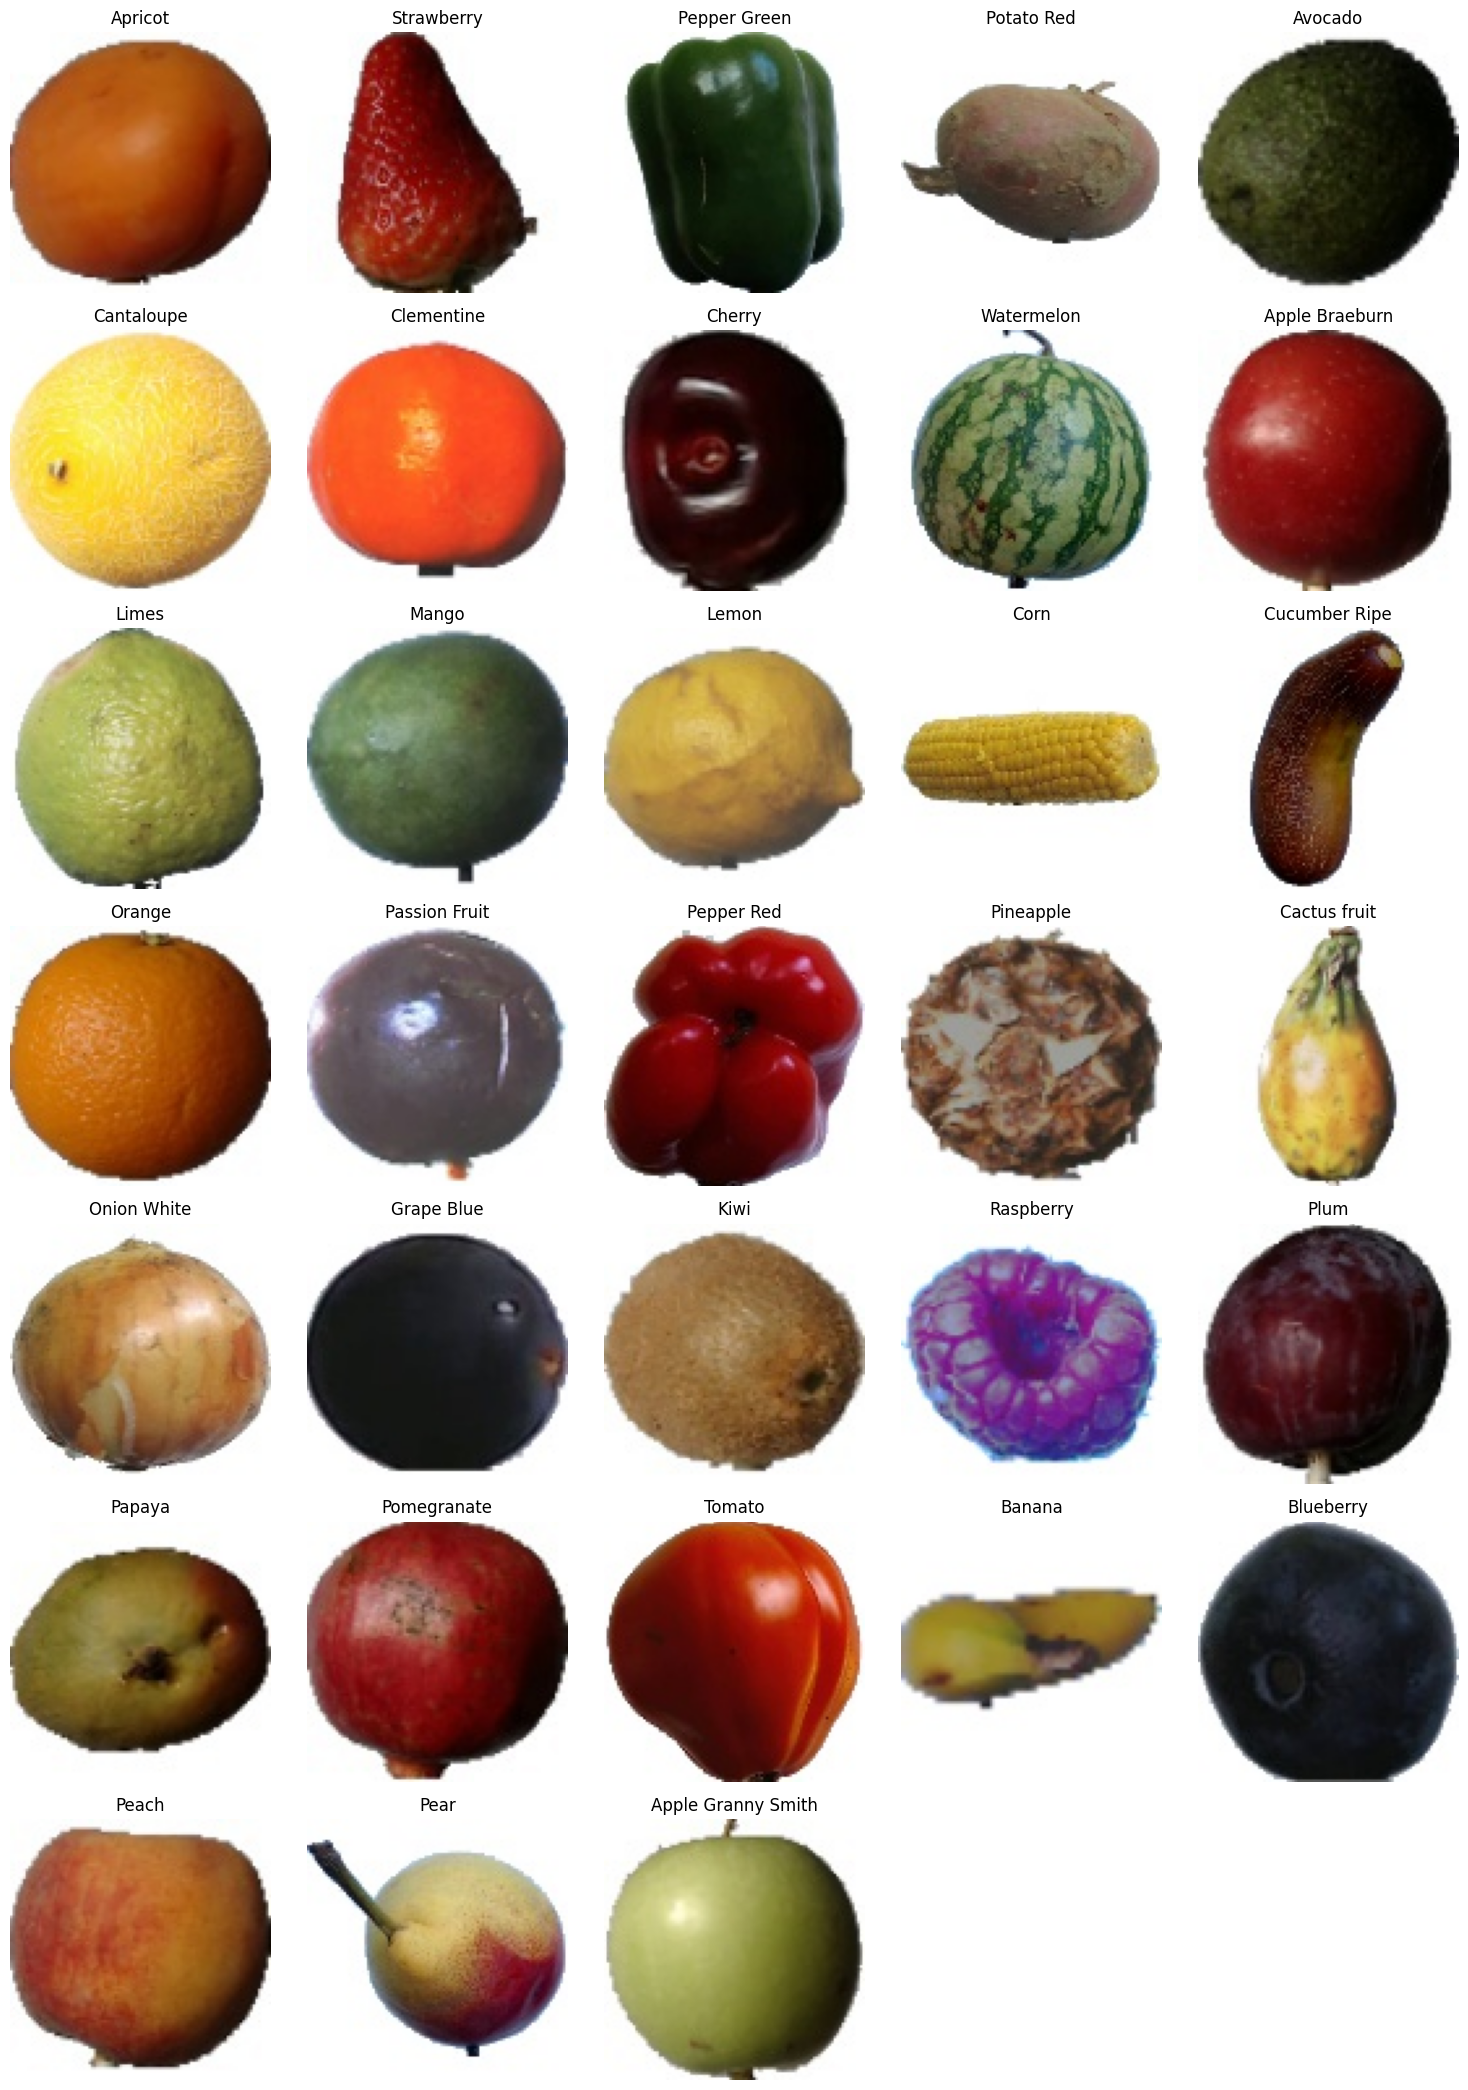

In [ ]:
import os
import random
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_path = 'train/train'
categories = [cat for cat in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, cat))]
num_category = categories  
num_img = 1

cols = 5
rows = math.ceil(len(num_category) / cols)

plt.figure(figsize=(cols * 3, rows * 3))
plot_index = 1

for category in num_category:
    category_path = os.path.join(base_path, category)
    img_files = os.listdir(category_path)
    sample_images = random.sample(img_files, min(num_img, len(img_files)))

    for img_file in sample_images:
        img_path = os.path.join(category_path, img_file)
        img = mpimg.imread(img_path)

        plt.subplot(rows, cols, plot_index)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
        plot_index += 1

plt.tight_layout()
plt.show()


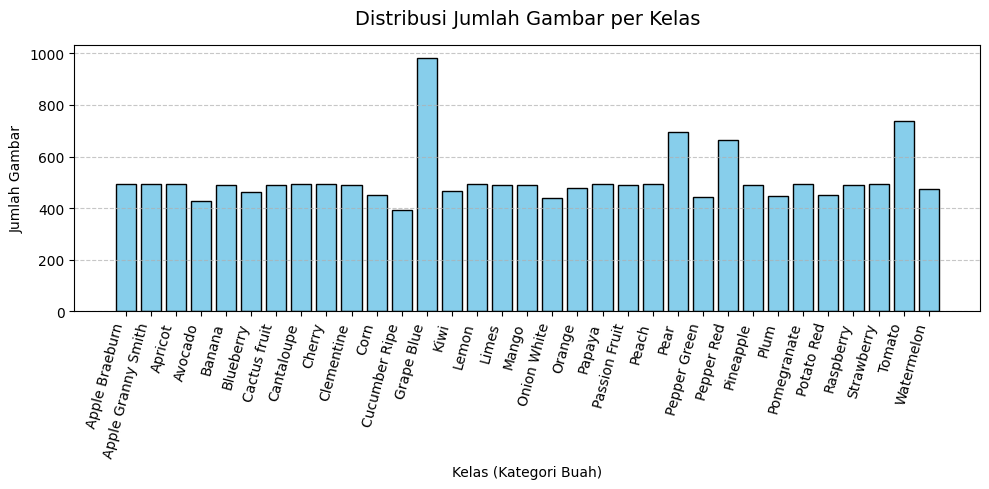

In [ ]:


base_path = 'train/train'
categories = [cat for cat in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, cat))]

class_counts = {cat: len(os.listdir(os.path.join(base_path, cat))) for cat in categories}

class_counts = dict(sorted(class_counts.items(), key=lambda x: x[0]))

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', edgecolor='black')
plt.xticks(rotation=75, ha='right')
plt.title('Distribusi Jumlah Gambar per Kelas', fontsize=14, pad=15)
plt.xlabel('Kelas (Kategori Buah)')
plt.ylabel('Jumlah Gambar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Data Preprocessing

In [55]:
import glob
input_dir = "train/train"

def balancing(input_dir, output_dir):
  if os.path.exists(output_dir):
      shutil.rmtree(output_dir)
  os.makedirs(output_dir)

  class_counts = {}
  all_files = {}

  for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = []
    for ext in ("*.jpg", "*.png", "*.jpeg"):
        images.extend(glob.glob(os.path.join(class_path, ext)))

    class_counts[class_name] = len(images)
    all_files[class_name] = images

  target_max = int(np.percentile(list(class_counts.values()), 75))

  balanced_counts = {}
  for class_name, count in class_counts.items():
      output_class_path = os.path.join(output_dir, class_name)
      os.makedirs(output_class_path)

      if count <= target_max:
          for img_path in all_files[class_name]:
              shutil.copy(img_path, output_class_path)
          balanced_counts[class_name] = count
          print(f"Keep all {class_name}: {count} images")

      else:
          selected_files = random.sample(all_files[class_name], target_max)
          for img_path in selected_files:
              shutil.copy(img_path, output_class_path)
          balanced_counts[class_name] = target_max
          print(f"Undersampled {class_name}: {count} -> {target_max}")

  return balanced_counts

balanced_dir = "balanced-dataset"
balanced_counts = balancing(input_dir, balanced_dir)

Keep all Apricot: 492 images
Keep all Strawberry: 492 images
Keep all Pepper Green: 444 images
Keep all Potato Red: 450 images
Keep all Avocado: 427 images
Keep all Cantaloupe: 492 images
Keep all Clementine: 490 images
Keep all Cherry: 492 images
Keep all Watermelon: 475 images
Keep all Apple Braeburn: 492 images
Keep all Limes: 490 images
Keep all Mango: 490 images
Keep all Lemon: 492 images
Keep all Corn: 450 images
Keep all Cucumber Ripe: 392 images
Keep all Orange: 479 images
Keep all Passion Fruit: 490 images
Undersampled Pepper Red: 666 -> 492
Keep all Pineapple: 490 images
Keep all Cactus fruit: 490 images
Keep all Onion White: 438 images
Undersampled Grape Blue: 984 -> 492
Keep all Kiwi: 466 images
Keep all Raspberry: 490 images
Keep all Plum: 447 images
Keep all Papaya: 492 images
Keep all Pomegranate: 492 images
Undersampled Tomato: 738 -> 492
Keep all Banana: 490 images
Keep all Blueberry: 462 images
Keep all Peach: 492 images
Undersampled Pear: 696 -> 492
Keep all Apple Gr

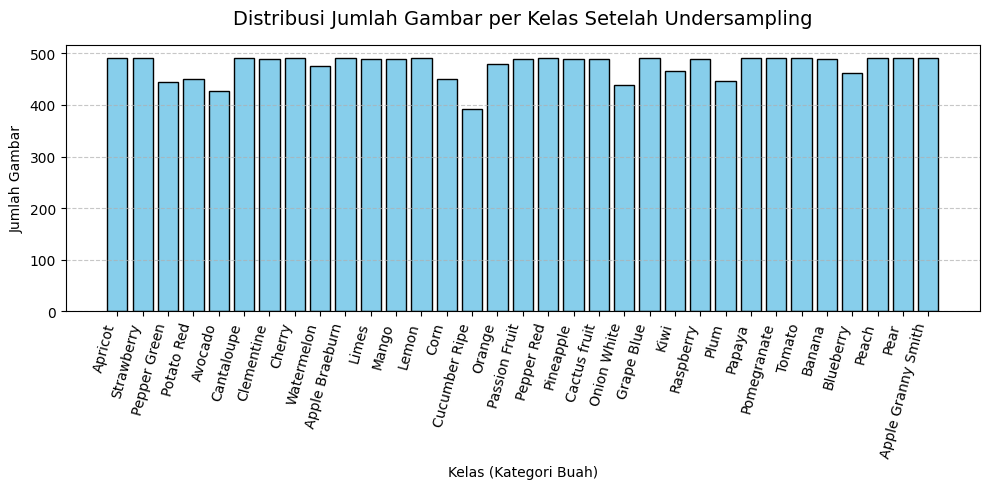

In [56]:
plt.figure(figsize=(10, 5))
plt.bar(balanced_counts.keys(), balanced_counts.values(), color='skyblue', edgecolor='black')
plt.xticks(rotation=75, ha='right')
plt.title('Distribusi Jumlah Gambar per Kelas Setelah Undersampling', fontsize=14, pad=15)
plt.xlabel('Kelas (Kategori Buah)')
plt.ylabel('Jumlah Gambar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:


balanced_df = pd.DataFrame(list(balanced_counts.items()), columns=['Category', 'Count'])
display(balanced_df)

Category  Count
0              Apricot    492
1           Strawberry    492
2         Pepper Green    444
3           Potato Red    450
4              Avocado    427
5           Cantaloupe    492
6           Clementine    490
7               Cherry    492
8           Watermelon    475
9       Apple Braeburn    492
10               Limes    490
11               Mango    490
12               Lemon    492
13                Corn    450
14       Cucumber Ripe    392
15              Orange    479
16       Passion Fruit    490
17          Pepper Red    492
18           Pineapple    490
19        Cactus fruit    490
20         Onion White    438
21          Grape Blue    492
22                Kiwi    466
23           Raspberry    490
24                Plum    447
25              Papaya    492
26         Pomegranate    492
27              Tomato    492
28              Banana    490
29           Blueberry    462
30               Peach    492
31                Pear    492
32  Apple Granny Smith    492

#### Split Dataset

In [ ]:
import os
import random
import shutil

balanced_dir = "balanced-dataset"
train_dir = "train_data"
validation_dir = "validation_data"
test_dir = "test_data" 

split_train = 0.7 
split_validation = 0.15 
split_test = 0.15 

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(validation_dir):
    shutil.rmtree(validation_dir)
if os.path.exists(test_dir): 
    shutil.rmtree(test_dir)

# Create new directories
os.makedirs(train_dir)
os.makedirs(validation_dir)
os.makedirs(test_dir) 

for category in os.listdir(balanced_dir):
    category_path = os.path.join(balanced_dir, category)
    if os.path.isdir(category_path):
        train_category_path = os.path.join(train_dir, category)
        validation_category_path = os.path.join(validation_dir, category)
        test_category_path = os.path.join(test_dir, category)

        os.makedirs(train_category_path)
        os.makedirs(validation_category_path)
        os.makedirs(test_category_path) 

        images = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
        random.shuffle(images)

        train_split_index = int(len(images) * split_train)
        validation_split_index = int(len(images) * (split_train + split_validation)) 

        train_images = images[:train_split_index]
        validation_images = images[train_split_index:validation_split_index] 
        test_images = images[validation_split_index:] 

        for img in train_images:
            src = os.path.join(category_path, img)
            dst = os.path.join(train_category_path, img)
            shutil.copyfile(src, dst)

        for img in validation_images:
            src = os.path.join(category_path, img)
            dst = os.path.join(validation_category_path, img)
            shutil.copyfile(src, dst)

        for img in test_images: 
            src = os.path.join(category_path, img)
            dst = os.path.join(test_category_path, img)
            shutil.copyfile(src, dst)


print("Data split into training, validation, and test sets.")

Data split into training, validation, and test sets.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='categorical'
)

print("Image data generators created.")

Found 11006 images belonging to 33 classes.
Found 2359 images belonging to 33 classes.
Image data generators created.


## Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.optimizers import Adam


num_classes = train_generator.num_classes

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Conv2D(32, (3, 3), activation='relu', padding='same'), 
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'), 
    Dropout(0.4), 
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 32)       │       147,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 33)             │         8,481 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,905,793 (56.86 MB)

 Trainable params: 191,105 (746.50 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.optimizers import Adam 

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min', min_lr=0.0001), # Reduced min_lr
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max'),
    TensorBoard(log_dir='logs')
]

print("Training with frozen base model...")
history_frozen = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=callbacks
)

print("\nUnfreezing layers for fine-tuning...")
for layer in base_model.layers[-20:]: 
    layer.trainable = True


model.compile(optimizer=Adam(learning_rate=0.00001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

print("\nContinuing training with fine-tuning...")
history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30, 
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=callbacks,
    initial_epoch=history_frozen.epoch[-1] + 1 
)

history = {
    'accuracy': history_frozen.history['accuracy'] + history_fine_tune.history['accuracy'],
    'val_accuracy': history_frozen.history['val_accuracy'] + history_fine_tune.history['val_accuracy'],
    'loss': history_frozen.history['loss'] + history_fine_tune.history['loss'],
    'val_loss': history_frozen.history['val_loss'] + history_fine_tune.history['val_loss']
}

Training with frozen base model...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 91s 254ms/step - accuracy: 0.0909 - loss: 3.3395 - val_accuracy: 0.5000 - val_loss: 2.1774 - learning_rate: 1.0000e-04
Epoch 2/10
  1/343 ━━━━━━━━━━━━━━━━━━━━ 31s 93ms/step - accuracy: 0.2188 - loss: 2.4049

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.2188 - loss: 2.4049 - val_accuracy: 0.5000 - val_loss: 2.1695 - learning_rate: 1.0000e-04
Epoch 3/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 86s 252ms/step - accuracy: 0.3729 - loss: 2.1843 - val_accuracy: 0.7312 - val_loss: 1.2180 - learning_rate: 1.0000e-04
Epoch 4/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6250 - loss: 1.4721 - val_accuracy: 0.7380 - val_loss: 1.2094 - learning_rate: 1.0000e-04
Epoch 5/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 81s 237ms/step - accuracy: 0.5648 - loss: 1.4509 - val_accuracy: 0.8746 - val_loss: 0.7071 - learning_rate: 1.0000e-04
Epoch 6/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5938 - loss: 1.3256 - val_accuracy: 0.8707 - val_loss: 0.7065 - learning_rate: 1.0000e-04
Epoch 7/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 82s 239ms/step - accuracy: 0.6818 - loss: 1.0437 - val_accuracy: 0.8938 - val_loss: 0.4903 - learning_rate: 1.0000e-04
Epoch 8/10
343/343 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 32)       │       147,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 33)             │         8,481 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,905,793 (56.86 MB)

 Trainable params: 14,905,793 (56.86 MB)

 Non-trainable params: 0 (0.00 B)


Continuing training with fine-tuning...
Epoch 11/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 121s 324ms/step - accuracy: 0.8414 - loss: 0.4874 - val_accuracy: 0.9961 - val_loss: 0.0264 - learning_rate: 1.0000e-05
Epoch 12/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9375 - loss: 0.2127 - val_accuracy: 0.9957 - val_loss: 0.0300 - learning_rate: 1.0000e-05
Epoch 13/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 105s 305ms/step - accuracy: 0.9383 - loss: 0.1862 - val_accuracy: 0.9996 - val_loss: 0.0037 - learning_rate: 1.0000e-05
Epoch 14/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 1.0000 - loss: 0.0349 - val_accuracy: 0.9991 - val_loss: 0.0051 - learning_rate: 1.0000e-05
Epoch 15/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 104s 304ms/step - accuracy: 0.9661 - loss: 0.1075 - val_accuracy: 0.9987 - val_loss: 0.0050 - learning_rate: 1.0000e-05
Epoch 16/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 1.0000 - loss: 0.0267 - val_accuracy: 0.9983 - val_loss: 0.0060 - learning_rate: 1.0000e-05
Ep

## Evaluasi dan Visualisasi

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Keep data in order for evaluation
)

print("Evaluating model on test set...")
loss, accuracy = model.evaluate(test_generator)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Found 2373 images belonging to 33 classes.
Evaluating model on test set...
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 1.0000 - loss: 3.0081e-05
Test Loss: 0.0000
Test Accuracy: 1.0000


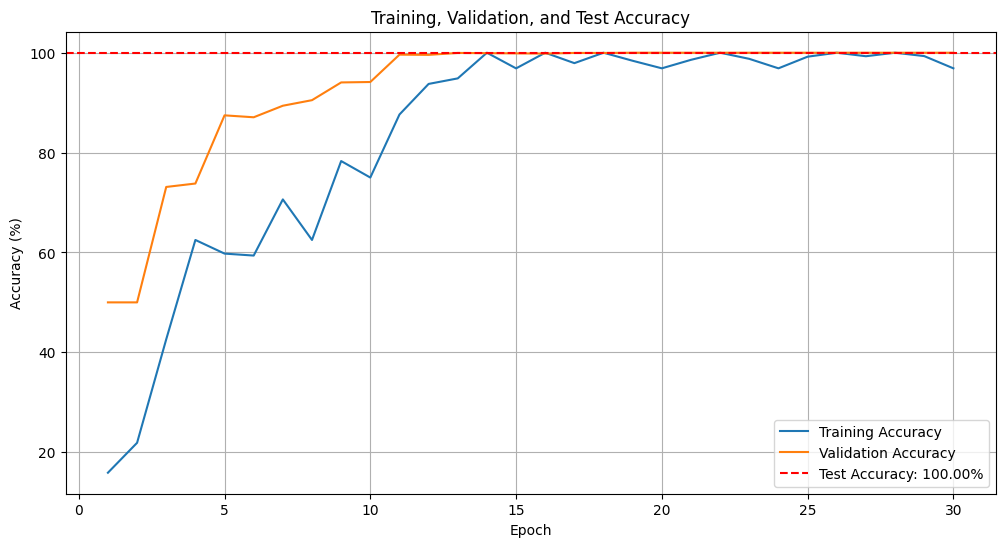

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, len(history['accuracy']) + 1 ), y=[acc * 100 for acc in history['accuracy']], label='Training Accuracy')
sns.lineplot(x=range(1, len(history['val_accuracy']) + 1), y=[acc * 100 for acc in history['val_accuracy']], label='Validation Accuracy')
plt.axhline(y=accuracy * 100, color='r', linestyle='--', label=f'Test Accuracy: {accuracy*100:.2f}%') # Add horizontal line for test accuracy
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

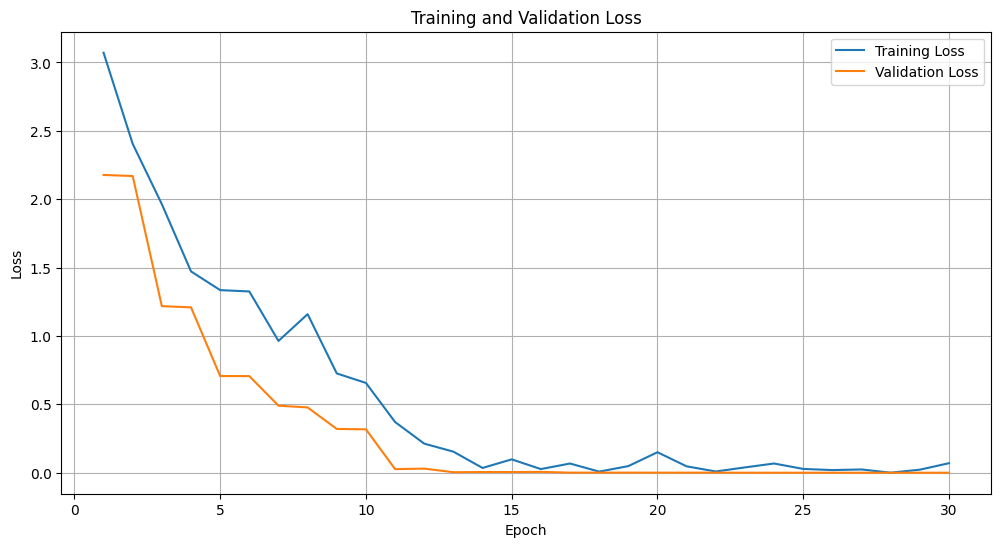

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, len(history['loss']) + 1 ), y=history['loss'], label='Training Loss')
sns.lineplot(x=range(1, len(history['val_loss']) + 1), y=history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Memeriksa Data Leakage

In [ ]:
import os

def check_data_leakage(train_dir, validation_dir, test_dir):
    train_files = set()
    for root, _, files in os.walk(train_dir):
        for file in files:
            train_files.add(file)

    validation_files = set()
    for root, _, files in os.walk(validation_dir):
        for file in files:
            validation_files.add(file)

    test_files = set()
    for root, _, files in os.walk(test_dir):
        for file in files:
            test_files.add(file)

    
    overlap_test_train = test_files.intersection(train_files)
    if overlap_test_train:
        print(f"Potential data leakage: {len(overlap_test_train)} files in both test and train sets.")
        
    else:
        print("No data leakage detected between test and train sets.")

    overlap_test_validation = test_files.intersection(validation_files)
    if overlap_test_validation:
        print(f"Potential data leakage: {len(overlap_test_validation)} files in both test and validation sets.")
    else:
        print("No data leakage detected between test and validation sets.")

    overlap_train_validation = train_files.intersection(validation_files)
    if overlap_train_validation:
        print(f"Potential data leakage: {len(overlap_train_validation)} files in both train and validation sets.")
    else:
        print("No data leakage detected between train and validation sets.")


check_data_leakage(train_dir, validation_dir, test_dir)

No data leakage detected between test and train sets.
No data leakage detected between test and validation sets.
No data leakage detected between train and validation sets.


74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step


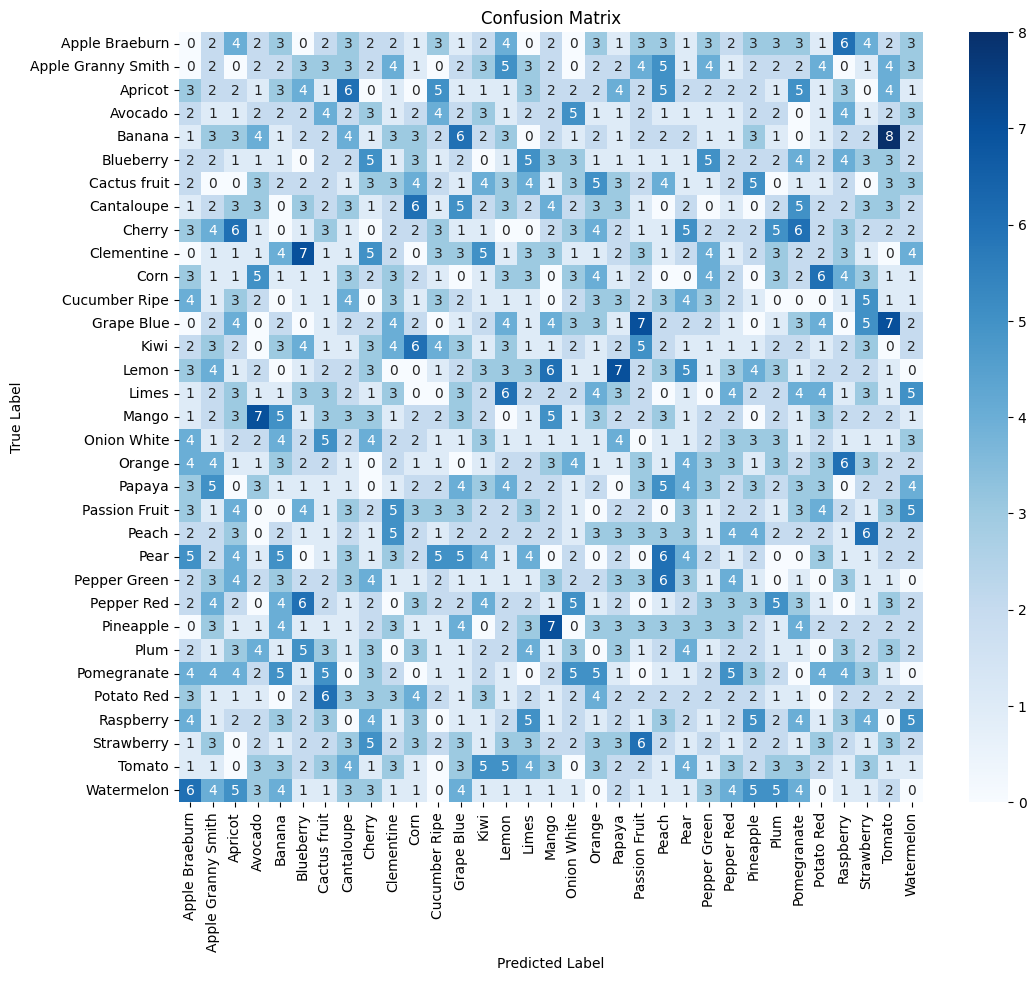

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


validation_generator.reset() 
Y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

class_labels = list(validation_generator.class_indices.keys())

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


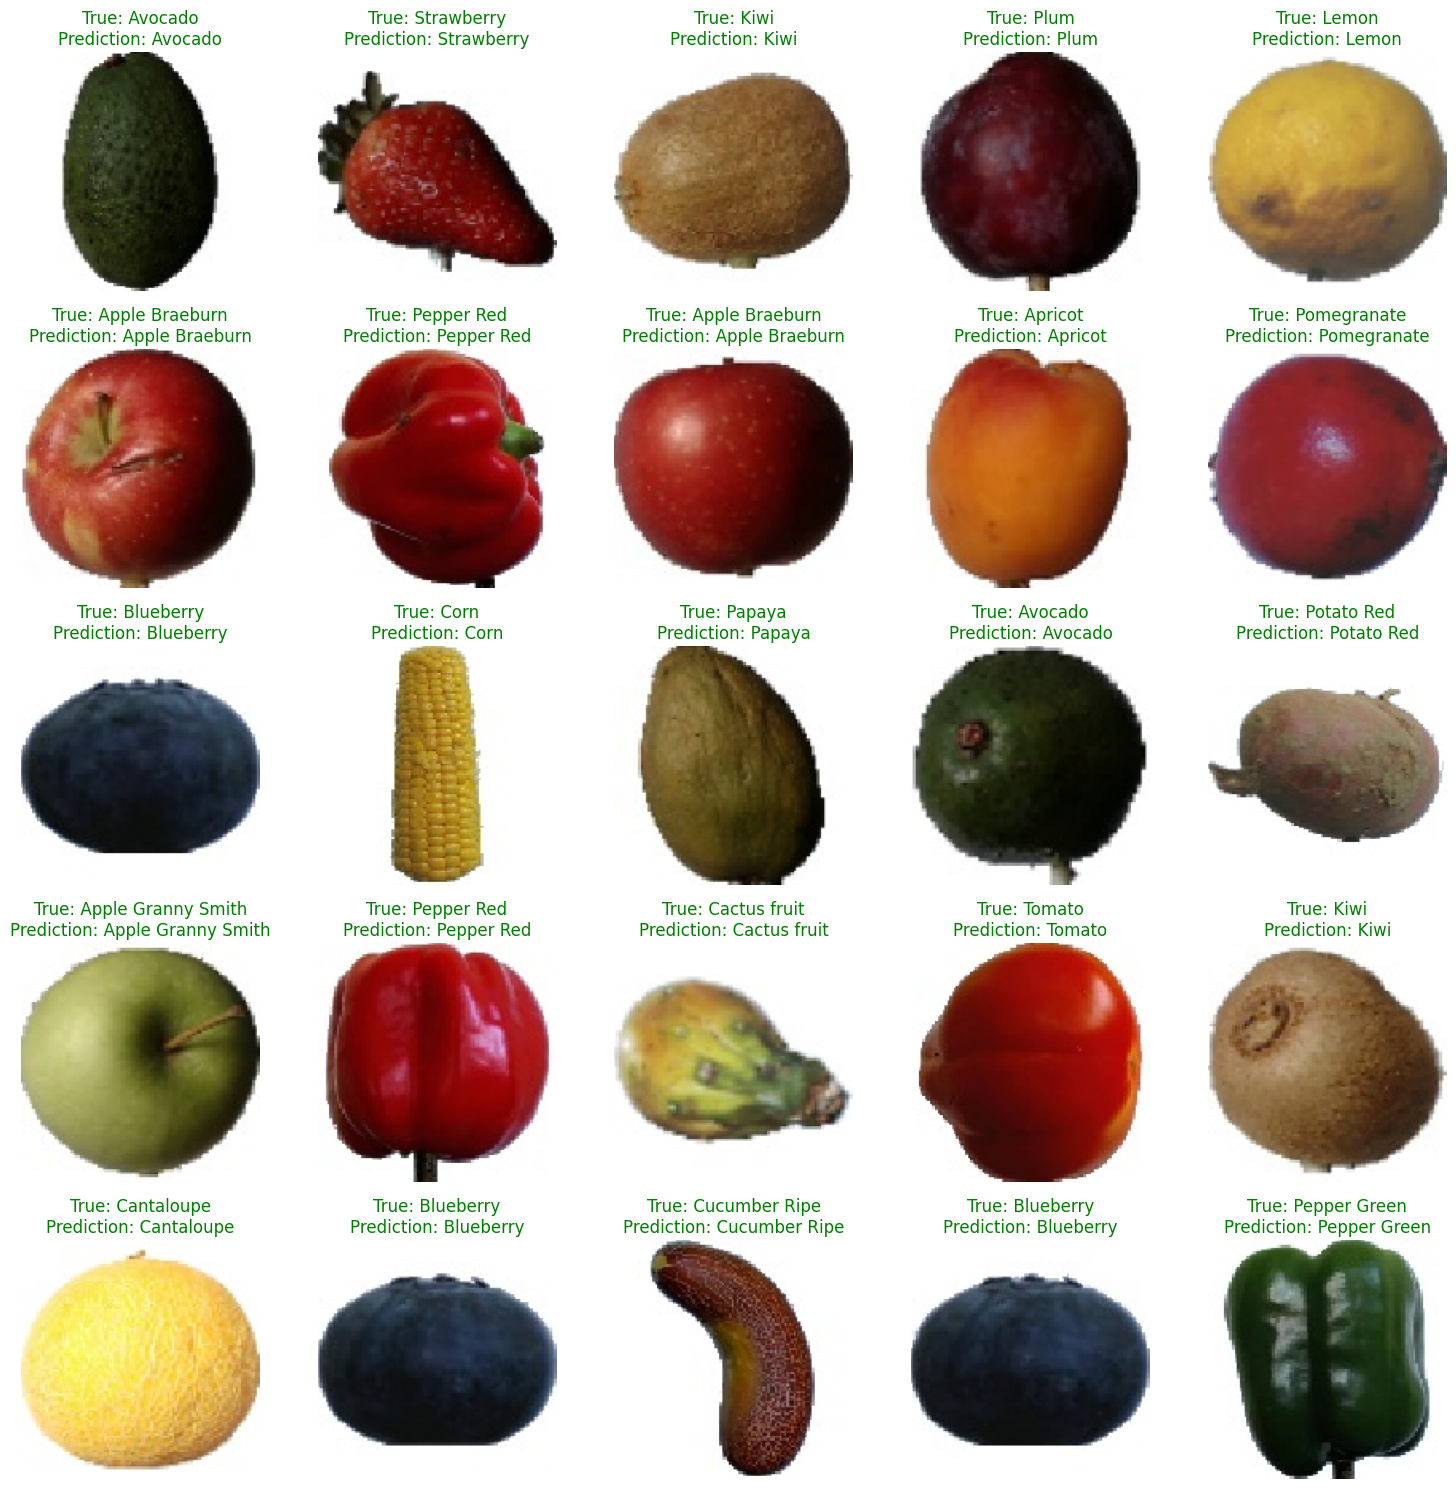

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

validation_generator.reset()
x, y = next(validation_generator)

predictions = model.predict(x)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y, axis=1)

class_labels = list(validation_generator.class_indices.keys())

plt.figure(figsize=(15, 15))
for i in range(25): 
    plt.subplot(5, 5, i + 1)
    plt.imshow(x[i])
    true_label = class_labels[true_classes[i]]
    predicted_label = class_labels[predicted_classes[i]]
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label}\nPrediction: {predicted_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Konversi Model

In [ ]:
import tensorflow as tf

saved_model_dir = 'saved_model'
model.export(saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been converted to TensorFlow Lite and saved as model.tflite")

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_77')
Output Type:
  TensorSpec(shape=(None, 33), dtype=tf.float32, name=None)
Captures:
  132615660586384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132615660587152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132615660596752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132615660599440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132615660596176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132615660586576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132615660592720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132615660585232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132615660587344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132615660586192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132613044636752

In [ ]:
import tensorflowjs as tfjs
import os

tfjs_model_dir = 'tfjs_model'

try:
    tfjs.converters.convert_tf_saved_model(
        saved_model_dir, tfjs_model_dir
    )
    print(f"Model has been converted to TensorFlow.js and saved in '{tfjs_model_dir}' directory")
except Exception as e:
    print(f"Error converting to TensorFlow.js: {e}")
    print("Please ensure 'saved_model' directory exists and contains a valid SavedModel.")

Model has been converted to TensorFlow.js and saved in 'tfjs_model' directory


## Inference (Optional)

Mengupload Gambar Random dari Google Image

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


Saving watermelon.jpg to watermelon (2).jpg
Saving download (3).jpg to download (3) (2).jpg
Saving download (2).jpg to download (2).jpg
Saving bluberi.jpg to bluberi (2).jpg
Saving stroberi.jpg to stroberi (2).jpg
Saving corn.jpg to corn (2).jpg


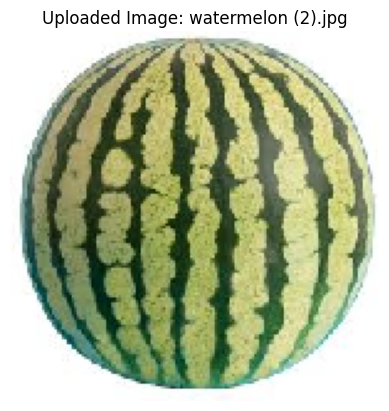

The predicted class is: Watermelon


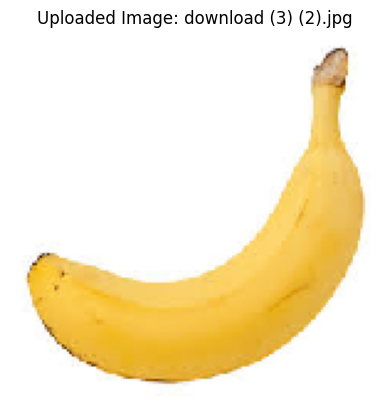

The predicted class is: Banana


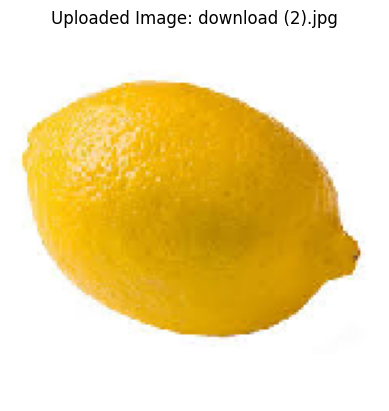

The predicted class is: Orange


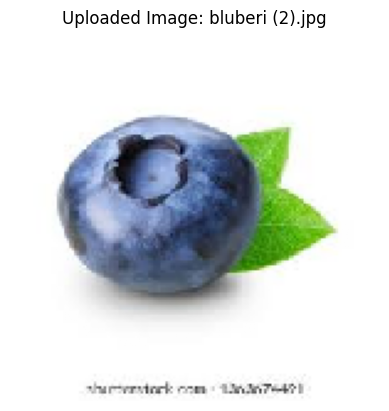

The predicted class is: Pepper Green


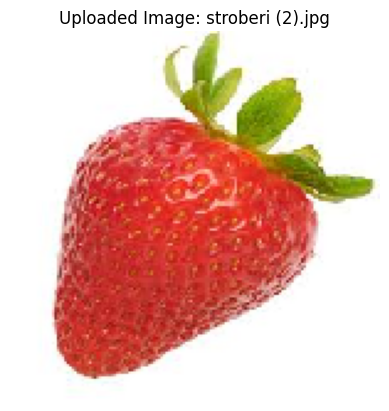

The predicted class is: Strawberry


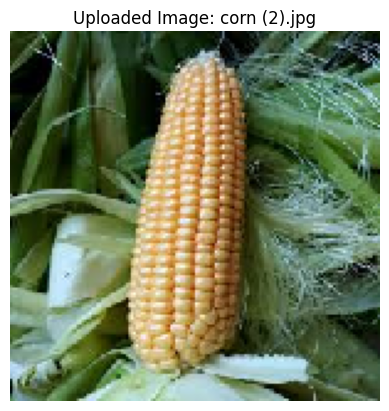

The predicted class is: Corn


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files
import io
import matplotlib.pyplot as plt

interpreter = tf.lite.Interpreter(model_path='/content/model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

uploaded = files.upload()

for fn in uploaded.keys():
  img = image.load_img(io.BytesIO(uploaded[fn]), target_size=(150, 150)) # Use the same target_size as in training
  img_array = image.img_to_array(img)

  plt.imshow(img_array/255.0)
  plt.title(f"Uploaded Image: {fn}")
  plt.axis('off')
  plt.show()

  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array / 255.0

  interpreter.set_tensor(input_details[0]['index'], img_array)

  interpreter.invoke()


  output_data = interpreter.get_tensor(output_details[0]['index'])
  predicted_class_index = np.argmax(output_data)


  try:
      class_labels = list(train_generator.class_indices.keys())
  except NameError:
      print("train_generator not found. Cannot get class labels.")
      class_labels = [f"class_{i}" for i in range(output_details[0]['shape'][1])]


  predicted_label = class_labels[predicted_class_index]

  print(f"The predicted class is: {predicted_label}")

### (tes kembali) Visualisasi Gambar dari Train, Validation, dan Test Set

Displaying 5 random images from Train Set:


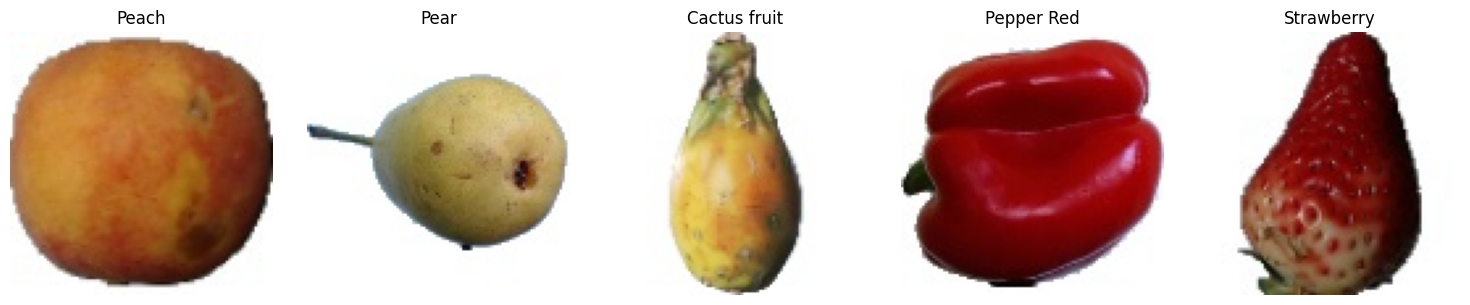

Displaying 5 random images from Validation Set:


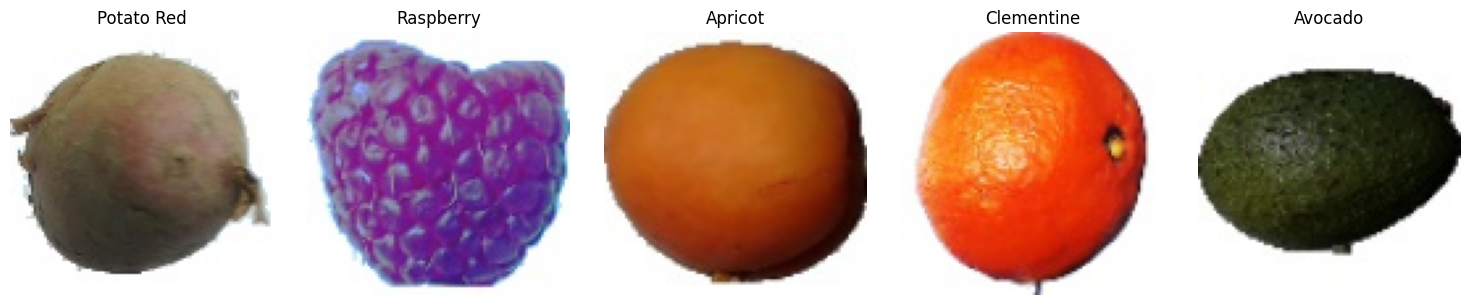

Displaying 5 random images from Test Set:


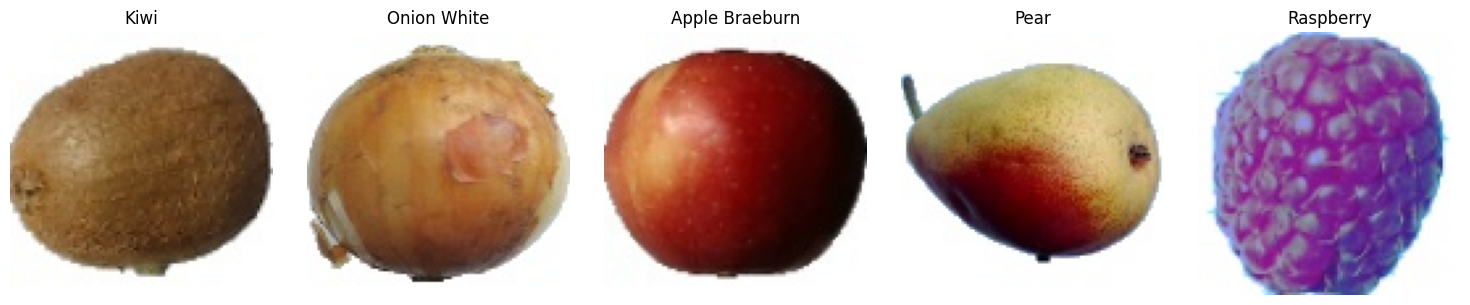

In [71]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_images(directory, title, num_images=5):
    plt.figure(figsize=(15, 3))
    print(f"Displaying {num_images} random images from {title}:")
    categories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    if not categories:
        print(f"No categories found in {directory}")
        return

    # Select random categories and images
    selected_categories = random.sample(categories, min(num_images, len(categories)))

    for i, category in enumerate(selected_categories):
        category_path = os.path.join(directory, category)
        images = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
        if images:
            img_path = os.path.join(category_path, random.choice(images))
            img = mpimg.imread(img_path)

            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')
        else:
            print(f"No images found in category {category} in {directory}")

    plt.tight_layout()
    plt.show()

# Display images from each set
display_random_images(train_dir, "Train Set")
display_random_images(validation_dir, "Validation Set")
display_random_images(test_dir, "Test Set")

## Model Evaluation on Test Set

In [ ]:
!pip freeze --local > requirements.txt

from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>